# Data Science and Business Analytics Internship - The Sparks Foundation
---
## Task 6 : Prediction Using Decision Tree Algorithm.
## Aim : Create a decision tree classifier and visualize it graphically.
## Author : Md Anzar Ahmad
---
**Language** : Python

**Libraries** : Scikit-learn, Pandas, Matplotlib, Seaborn, IPython & Pydotplus.

**Dataset** : Iris Petal Sklearn Dataset

**Input Features** : Sepal length, Sepal width, Petal length & Petal width

**Output Labels** : Iris species (setosa, versicolor & virginica)

---

## Importing Necessary Libraries

In [1]:
import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image  
import pydotplus

## Loading Dataset and Formulating the Dataframe

In [2]:
# Loading dataset
iris_data = datasets.load_iris()

# Creating dataframe
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Adding target values as a column in dataframe
df['target'] = iris_data.target

# Printing dataframe head
print(df.head(15))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

## Analysis of Dataset
---
### Figuring out Dataset's Information

In [3]:
#Printing dataframe information
print("Dataset Information -->\n")
print(df.info())
print("\n"*2)

#Printing target values of dataset
target = iris_data.target
print("All target values -->\n")
print(target)
print("\n"*2)

#Printing unique target values of dataset
unique = df['target'].unique()
print("Unique target values -->\n")
print(unique)
print("\n"*2)

#Checking the presence of NULL values
null_check = df.isnull().sum()
print("Null values -->\n")
print(null_check)
print("\nAs clearly seen above, there are no null values and thus, there's no need to process it.")
print("\n"*2)

#Printing mathematical dataset analysis
print("Rigorous mathematical analysis of dataset -->\n")
print(df.describe())

Dataset Information -->

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None



All target values -->

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



Unique target values -->

[0 1 2]



Null values -->

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0

## Visualizing the Dataframe

Visualizing dataframe -->






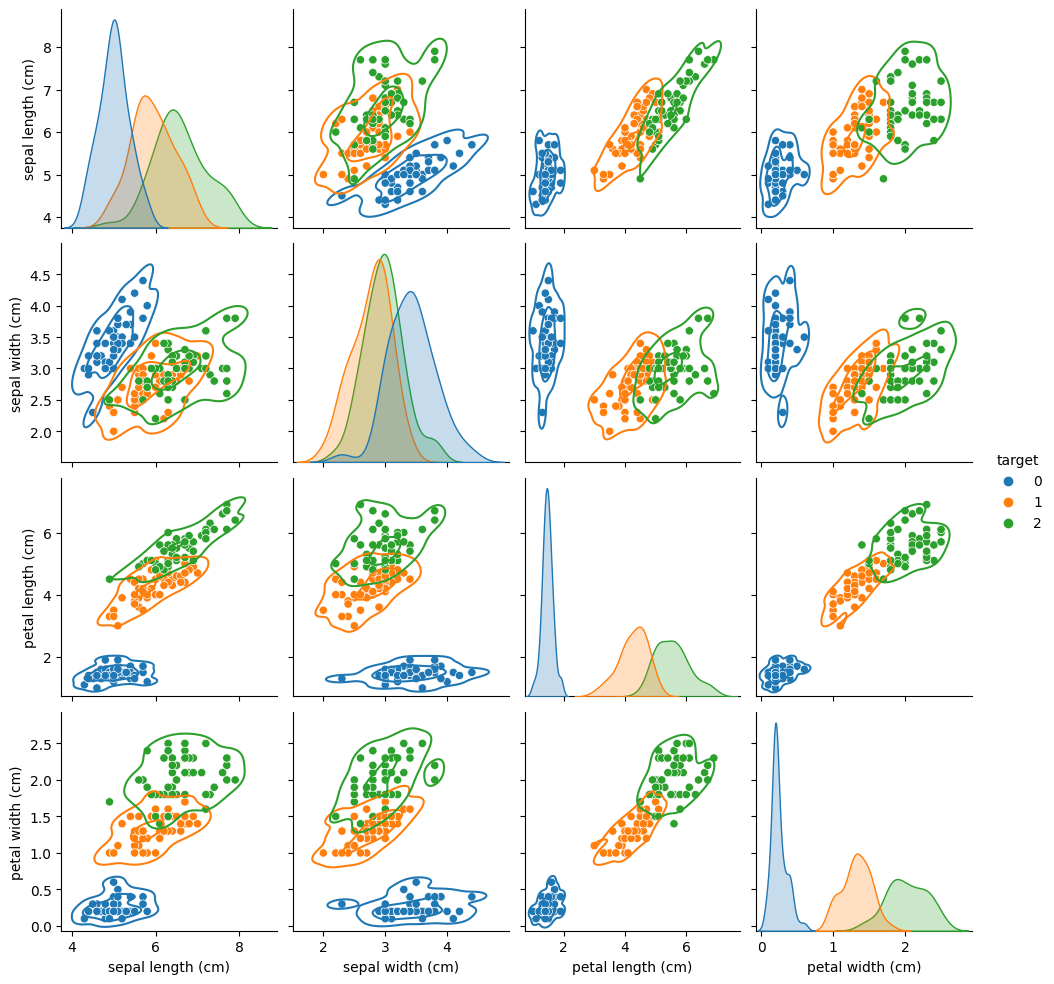

In [4]:
#Printing visual plots for dataframe
print("Visualizing dataframe -->\n")
plot_var_1 = sns.pairplot(df, kind = 'scatter', diag_kind='kde', hue = 'target', palette=["C0", "C1", "C2"])
plot_var_2 = plot_var_1.map_lower(sns.kdeplot, levels=3)
plot_1 = plot_var_2.map_upper(sns.kdeplot, levels=3)
print(plot_1)
print("\n"*2)

## Visualizing the Correlation among features

Visualizing correlation between features using heatmap -->

AxesSubplot(0.125,0.11;0.62x0.77)


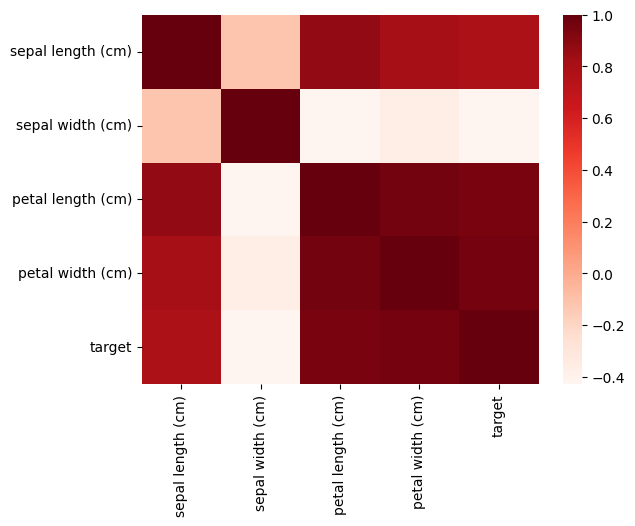

In [5]:
#Checking correlation among features
print("Visualizing correlation between features using heatmap -->\n")
plot_2 = sns.heatmap(df.corr(method='pearson'), cmap='Reds')
print(plot_2)

## Visualizing the distribution of target values via Pie Chart

Pie Chart for all target values -->



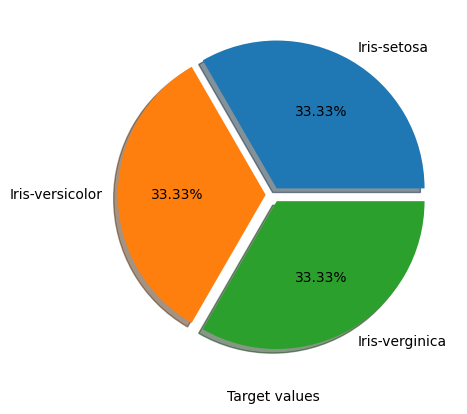

In [6]:
#Printing pie chart for target value distribution
print("Pie Chart for all target values -->\n")
temp_var_1 = df['target'].value_counts()
plt.pie(temp_var_1.values, labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-verginica'], explode = (0.05,0.05,0.05), autopct='%1.2f%%', shadow=True)
plt.xlabel('Target values')
plt.show()

## Preparing data for Training and Testing.
---
### Getting the X and Y dataset ready.

In [7]:
#Segregating dataset into input and output (X and Y)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y = df[['target']]
print("The X dataset -->\n")
print(X)
print("\n"*2)
print("The Y dataset -->\n")
print(Y)

The X dataset -->

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]



The Y dataset -->


## Splitting the Datasets into 80:20 ratio for Train and Test set

In [8]:
#Splitting the datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)

print("The X training dataset -->\n")
print(X_train)
print("\n"*2)
print("The X test dataset -->\n")
print(X_test)
print("\n"*2)
print("The Y train dataset -->\n")
print(Y_train)
print("\n"*2)
print("The Y test dataset -->\n")
print(Y_test)
print("\n"*2)

#Printing dataset sizes
print("Dataset sizes -->\n")
print('X Training data size  : ',X_train.size, "values")
print('X Test data size      : ',X_test.size, "values")
print('Y Training data size  : ',Y_train.size, "values")
print('Y Test data size      : ',Y_test.size, "values")

The X training dataset -->

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
63                 6.1               2.9                4.7               1.4
108                6.7               2.5                5.8               1.8
140                6.7               3.1                5.6               2.4
32                 5.2               4.1                1.5               0.1
42                 4.4               3.2                1.3               0.2
..                 ...               ...                ...               ...
126                6.2               2.8                4.8               1.8
57                 4.9               2.4                3.3               1.0
121                5.6               2.8                4.9               2.0
131                7.9               3.8                6.4               2.0
77                 6.7               3.0                5.0               1.7

[120 rows x 4 columns]



The X tes

## Decision Tree Model Creation.
---
### Creating and training the decision tree model.

In [9]:
#Creating model
#We can experiment with values of max_depth and random_state
dt_model = DecisionTreeClassifier(max_depth = 10, random_state = 2)
#Fitting the model
dt_model.fit(X_train,Y_train)

print("Decision Tree created !")

Decision Tree created !


## Predicting and Evaluating the Model.

In [10]:
#Making presictions
Y_pred = dt_model.predict(X_test)

#Using various evaluation parameters
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test,Y_pred)
accuracy = dt_model.score(X_test,Y_test)

print("Confusion Matrix -->\n")
print(conf_matrix)
print("\n"*2)
print("Classification Report -->\n")
print(class_report)
print("\n"*2)
print("Model Score-->\n")
print(accuracy)
print()
print("This signifies that the model's accuracy is :", (str(format(accuracy*100, '.2f')) + "%"), "!")

Confusion Matrix -->

[[13  0  0]
 [ 0  7  1]
 [ 0  1  8]]



Classification Report -->

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.88      0.88         8
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30




Model Score-->

0.9333333333333333

This signifies that the model's accuracy is : 93.33% !


## Making Prediction on Custom Values

In [11]:
#Defining a function to return message reagarding predicted output speicies 
def species(num):
  if (num == 0):
    return "The predicted species for custom input is Iris-setosa !"
  elif (num == 1):
    return "The predicted species for custom input is Iris-versicolor !"
  elif (num == 2):
    return "The predicted species for custom input is Iris-virginica !"
  else:
    print("Prediction Error !")

#Making custom prediction
custom_pred = species(dt_model.predict([[5.9,3.0,5.1,1.8]]))
print(custom_pred)

The predicted species for custom input is Iris-virginica !


C:\Program Files\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualizing the Decision Tree Model
---
### Visualizing Graphically

Visual Graphic of Decision Tree model -->



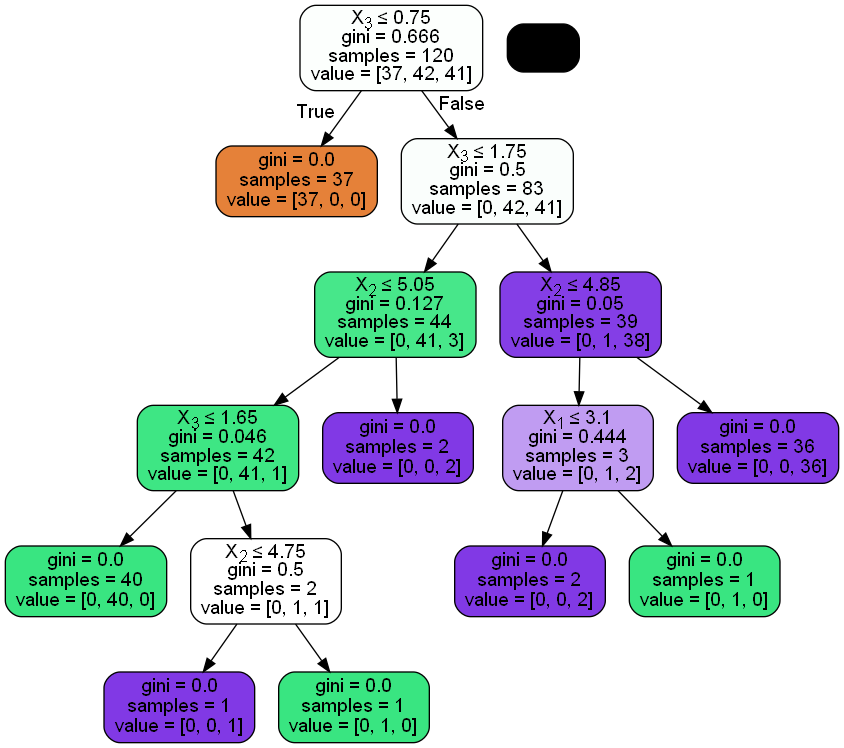

In [12]:
#Printing graphical visual of decision tree
print("Visual Graphic of Decision Tree model -->\n")
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data, filled = True, rotate = False, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Visualizing Textually

In [13]:
#Printing text visual of decision tree
text_visual = export_text(dt_model,feature_names=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'))
print("Text Visual of decision tree -->\n")
print(text_visual)

Text Visual of decision tree -->

|--- PetalWidthCm <= 0.75
|   |--- class: 0
|--- PetalWidthCm >  0.75
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 5.05
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- PetalLengthCm <= 4.75
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- PetalLengthCm >  4.75
|   |   |   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  5.05
|   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 2



# Thank You!